### Imports

In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

### Implementación de ANOVA de dos factores
#### Caso donde se estudia la interacción entre dos niveles de temperatura y dos niveles de disolución.

1. En primer lugar se debe hacer un dataframe, o sea, importar los datos de la tabla de excel, en formato csv, preferiblemente. (también se acepta txt)
2. Los datos deben estar balanceados, es decir, haber tomado la misma cantidad de réplicas para cada tratamiento de cada nivel.
3. Luego pasar un print statement del dataframe para cerciorarse que se importaron los datos correctamente.

In [2]:
df = pd.read_csv("anova.csv")
print(df)

"""Note que la columna izquierda se agregó automáticamente e indica el orden de las filas, y cada columna se encuentra separada por un espacio en blanco."""


    Replica  Temperatura Disolucion  Resultado
0         1           25       NaCl    138.400
1         2           25       NaCl    130.890
2         3           25       NaCl     94.646
3         4           25       NaCl     96.653
4         5           25       NaCl    116.900
5         6           25       NaCl     88.215
6         1           25    Fosfato    120.180
7         2           25    Fosfato    129.430
8         3           25    Fosfato    139.760
9         4           25    Fosfato    132.750
10        5           25    Fosfato    137.230
11        6           25    Fosfato    121.730
12        1           37       NaCl     92.312
13        2           37       NaCl    147.280
14        3           37       NaCl    116.480
15        4           37       NaCl     88.802
16        5           37       NaCl    114.370
17        6           37       NaCl     90.737
18        1           37    Fosfato    123.500
19        2           37    Fosfato    128.940
20        3  

'Note que la columna izquierda se agregó automáticamente e indica el orden de las filas, y cada columna se encuentra separada por un espacio en blanco.'

### Interacciones
Ahora para determinar si realmente existen interacciones entre los factores se hace un gráfico de interacciones. Si se intersecan al menos una vez existen indicios de que sí hay.

Se hace con el código de abajo. Primero se ingresa el parámetro que se quiere en el eje x, luego el parámetro que tiene dos niveles, por último el parámetro que va en el eje y

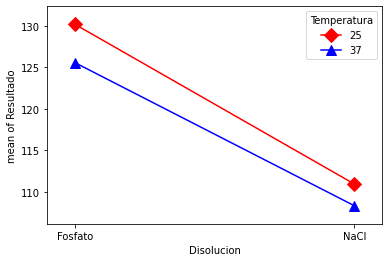

In [3]:
fig = interaction_plot(df.Disolucion, df.Temperatura, df.Resultado,
             colors=['red','blue'], markers=['D','^'], ms=10)

### Variables para el ANOVA

In [5]:
# ANOVA
df.head()

ANOVA = AnovaRM(df, 'Resultado', 'Replica', within =['Temperatura', 'Disolucion'])
Resultados = ANOVA.fit()

print(Resultados)
"""F value es el valor F; Num DF son los grados de libertad de cada número; Den DF son los grados libertad en la diferencia de cuadrados y Pr es el p-value correspondiente para aceptar o rechazar la hipotesis nula"""


                       Anova
                       F Value Num DF Den DF Pr > F
---------------------------------------------------
Temperatura             0.3554 1.0000 5.0000 0.5770
Disolucion              5.9893 1.0000 5.0000 0.0581
Temperatura:Disolucion  0.0157 1.0000 5.0000 0.9052



'F value es el valor F; Num DF son los grados de libertad de cada número; Den DF son los grados libertad en la diferencia de cuadrados y Pr es el p-value correspondiente para aceptar o rechazar la hipotesis nula'